### Install requirements

In [ ]:
! pip install -r requirements.txt

### import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix ,accuracy_score


### Get DataSet

In [2]:
combined_lines= []
with open("./dataset/KDDTrain+.txt","r") as f_train ,  open("./dataset/KDDTest+.txt") as f_test:
    for line1 in f_train :
        combined_lines.append(line1.strip())

    for line2 in f_test :
        combined_lines.append(line2.strip())

save data in one file to used in cross validation and TTS

In [3]:
with open("./dataset/combined_dataSource.txt", "w+") as f:
    f.write("\n".join(combined_lines))

In [4]:
df = pd.read_csv("./dataset/combined_dataSource.txt")

In [5]:
df.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03',
       '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

In [6]:
header_column = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [7]:
df.columns = header_column

In [8]:
df.values

array([[0, 'udp', 'other', ..., 0.0, 'normal', 15],
       [0, 'tcp', 'private', ..., 0.0, 'neptune', 19],
       [0, 'tcp', 'http', ..., 0.01, 'normal', 21],
       ...,
       [0, 'tcp', 'http', ..., 0.07, 'back', 15],
       [0, 'udp', 'domain_u', ..., 0.0, 'normal', 21],
       [0, 'tcp', 'sunrpc', ..., 1.0, 'mscan', 14]], dtype=object)

In [9]:
df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148516 entries, 0 to 148515
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148516 non-null  int64  
 1   protocol_type                148516 non-null  object 
 2   service                      148516 non-null  object 
 3   flag                         148516 non-null  object 
 4   src_bytes                    148516 non-null  int64  
 5   dst_bytes                    148516 non-null  int64  
 6   land                         148516 non-null  int64  
 7   wrong_fragment               148516 non-null  int64  
 8   urgent                       148516 non-null  int64  
 9   hot                          148516 non-null  int64  
 10  num_failed_logins            148516 non-null  int64  
 11  logged_in                    148516 non-null  int64  
 12  num_compromised              148516 non-null  int64  
 13 

In [11]:
# Check for attack values
df['outcome'].value_counts()

outcome
normal             77053
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm         

In [12]:
# check is there any null value in the dataset
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,148516.000000,1.485160e+05,1.485160e+05,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,...,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000,148516.000000
mean,276.781168,4.022822e+04,1.708897e+04,0.000215,0.020523,0.000202,0.189380,0.004323,0.402792,0.255063,...,119.463297,0.534523,0.084103,0.145932,0.030584,0.256124,0.251306,0.136221,0.136398,19.278475
std,2460.691310,5.409630e+06,3.703537e+06,0.014677,0.240070,0.019417,2.013167,0.072248,0.490461,22.231450,...,111.232422,0.448062,0.194103,0.308639,0.108975,0.428501,0.429720,0.322742,0.335283,2.739766
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [14]:
df.loc[df['outcome'] != 'normal', 'outcome'] = 'attack'

In [15]:
df['outcome'].value_counts()

outcome
normal    77053
attack    71463
Name: count, dtype: int64

<Axes: xlabel='outcome'>

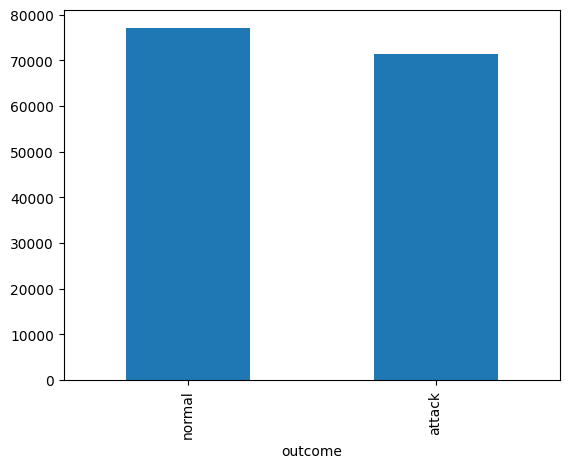

In [16]:
df['outcome'].value_counts().plot(kind="bar")

In [17]:
df.shape

(148516, 43)

### Data Visualzation

In [18]:
# the function creates a grid of pie charts, each showing the distribution of values for a specific column in the DataFrame df

def pie_plot(df, cols_list, nb_row, nb_col):
    fig, axes = plt.subplots(nb_row, nb_col)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

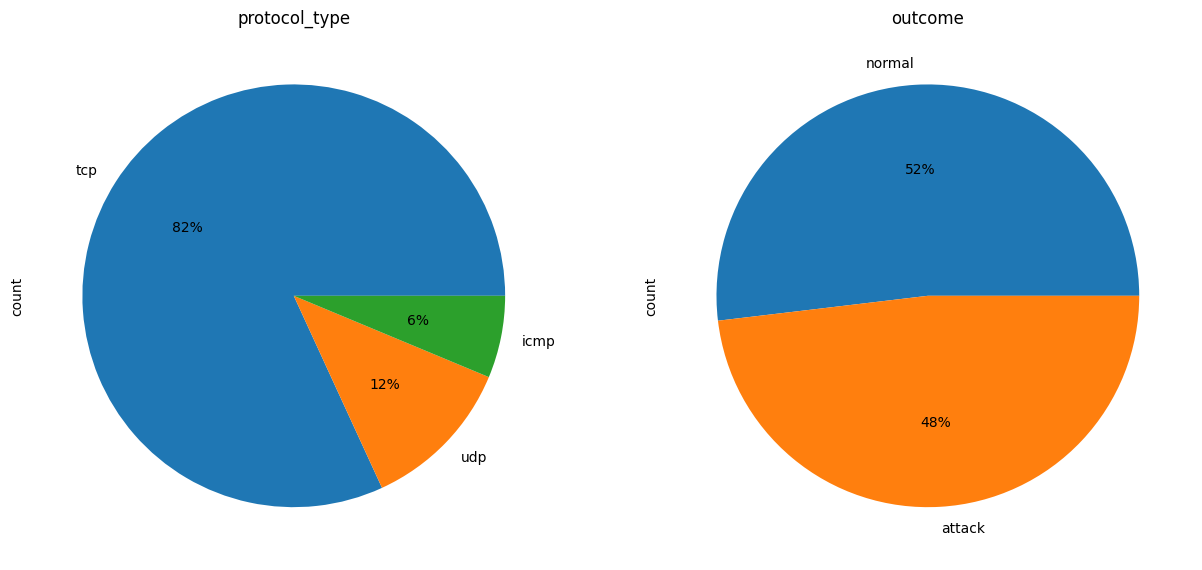

In [19]:
pie_plot(df, ['protocol_type', 'outcome'], 1, 2)

<Axes: xlabel='protocol_type', ylabel='count'>

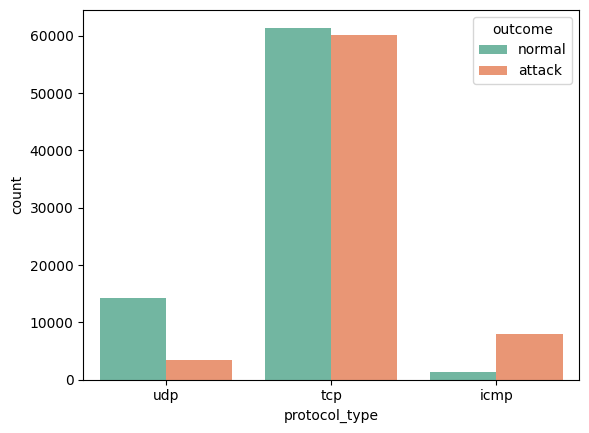

In [20]:
# visualize the distribution of different attacks based on the protocol type in the dataset
sns.countplot(x='protocol_type',hue='outcome' , data = df , palette ='Set2')

<Axes: xlabel='logged_in'>

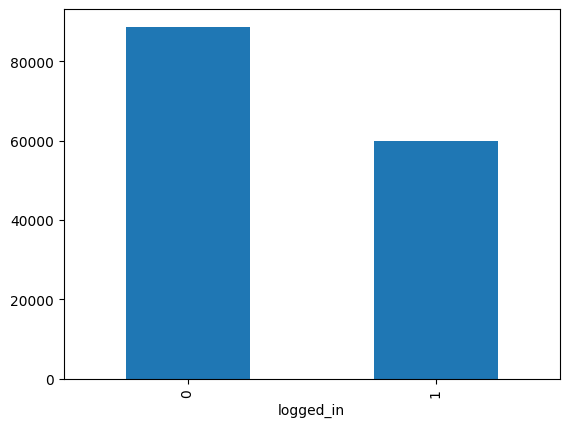

In [21]:
df["logged_in"].value_counts().plot(kind="bar")

### Data correlation

he degree to which one variable changes in relation to another. It measures the strength and direction of the relationship between two or more variables

we gonna check correleation between variables in our dataset to see which ones can be not used in our model
- 1 indicates a perfect positive linear relationship
- -1 indicates a perfect negative linear relationship
- 0 indicates no linear relationship.


In [22]:
df['num_root'].corr(df['num_compromised'])

0.9987247769091462

In [23]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9915070493718149

In [24]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.7078247941500132

In [25]:
# Label Encoder for categorical variables
pl=preprocessing.LabelEncoder()
for x in ['service', 'flag']:
    df[x]=pl.fit_transform(df[x])

pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [26]:
df.loc[df['outcome'] == "normal", "outcome"] = 0
df.loc[df['outcome'] != 0, "outcome"] = 1

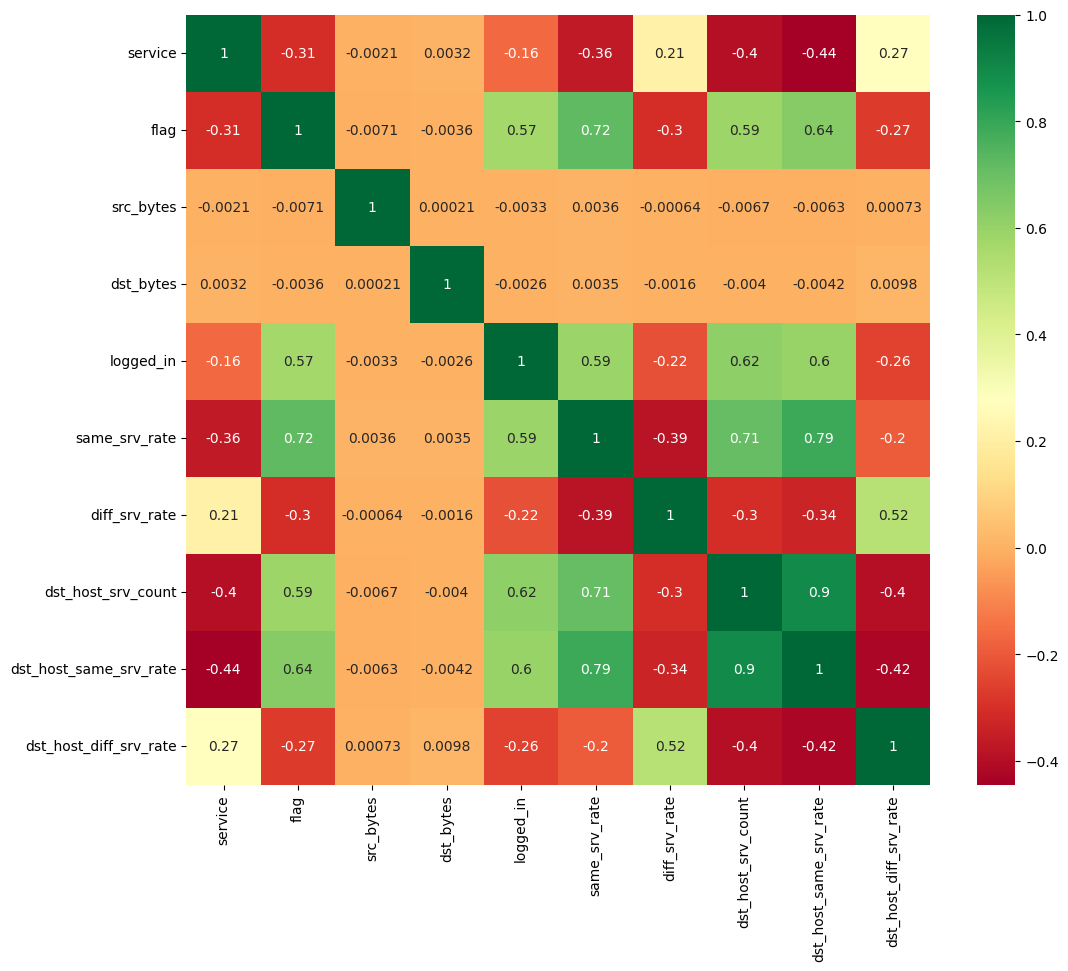

In [27]:
coll = ['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate']

plt.figure(figsize=(12,10))
p=sns.heatmap(df[coll].corr(), annot=True,cmap ='RdYlGn')

### Data Splitting

In [28]:
Y = df['outcome']
X = df.drop('outcome', axis=1)

In [29]:
print("#############  X :\n",X.columns,"\n\n#############  Y :\n",Y.head(6))

#############  X :
 Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object') 

#############  Y :
 0    0
1    1
2    0
3    0
4    1
5    1
Name: outcome, dtype: object


In [30]:
if not issubclass(Y.dtype.type, np.integer):
    Y = Y.astype(np.int64)
    print("Converted Y to integer type")
else:
    print("Y is already of integer type")

Converted Y to integer type


training model by tts and cross validation to compare between them

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print("Training data : \n\nx : ",x_train.shape ," y : ", y_train.shape,"\n\nTesting data : \n\nx :",x_test.shape ," y : ", y_test.shape)

Training data : 

x :  (118812, 42)  y :  (118812,) 

Testing data : 

x : (29704, 42)  y :  (29704,)


fit every algo in our dictionnary

In [35]:
models_to_analys = {
    'Logistic_Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors = 42),
    'Decision_Trees': DecisionTreeClassifier(max_depth=3),
    'Random_Forest': RandomForestClassifier()
}

In [57]:
# Initialize metrics dictionaries
accuracy_tts, precision_tts, recall_tts = {}, {}, {}

for key, model in models_to_analys.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    # Calculate metrics
    accuracy_tts[key] = accuracy_score(predictions, y_test)
    precision_tts[key] = precision_score(predictions, y_test, average='weighted')
    recall_tts[key] = recall_score(predictions, y_test, average='weighted')

C:\Users\yassi\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
accuracy_tts

{'Logistic_Regression': 0.867896579585241,
 'KNN': 0.9836049016967412,
 'Decision_Trees': 0.9624293024508483,
 'Random_Forest': 0.9992930245084837}

In [53]:
# to use cross validation for decision tree and random forest and knn
last_two_models = list(models_to_analys.items())[1:]
models_cv = dict(last_two_models)

In [54]:
scoring = 'accuracy'  

accuracy_cv, precision_cv, recall_cv = {}, {}, {}

for key, model in models_cv.items():
    print(model)
    # Perform cross-validation
    scores = cross_val_score(model, X, Y, cv=5, scoring=scoring)
    accuracy_cv[key] = scores.mean()


KNeighborsClassifier(n_neighbors=42)
DecisionTreeClassifier(max_depth=3)
RandomForestClassifier()


In [55]:
accuracy_cv

{'KNN': 0.9557890661765501,
 'Decision_Trees': 0.9605024866022804,
 'Random_Forest': 0.9731407633661044}

Dataframe for tts models

In [59]:
df_model_trained_by_tts = pd.DataFrame(index=models_to_analys.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model_trained_by_tts['Accuracy'] = accuracy_tts.values()
df_model_trained_by_tts['Precision'] = precision_tts.values()
df_model_trained_by_tts['Recall'] = recall_tts.values()

df_model_trained_by_tts

,Accuracy,Precision,Recall
Logistic_Regression,0.867897,0.876846,0.867897
KNN,0.983605,0.983607,0.983605
Decision_Trees,0.962429,0.964292,0.962429
Random_Forest,0.999293,0.999293,0.999293


In [60]:
# save values in csv file

df_model_trained_by_tts.to_csv("./dataset/df_model_trained_by_tts.csv")

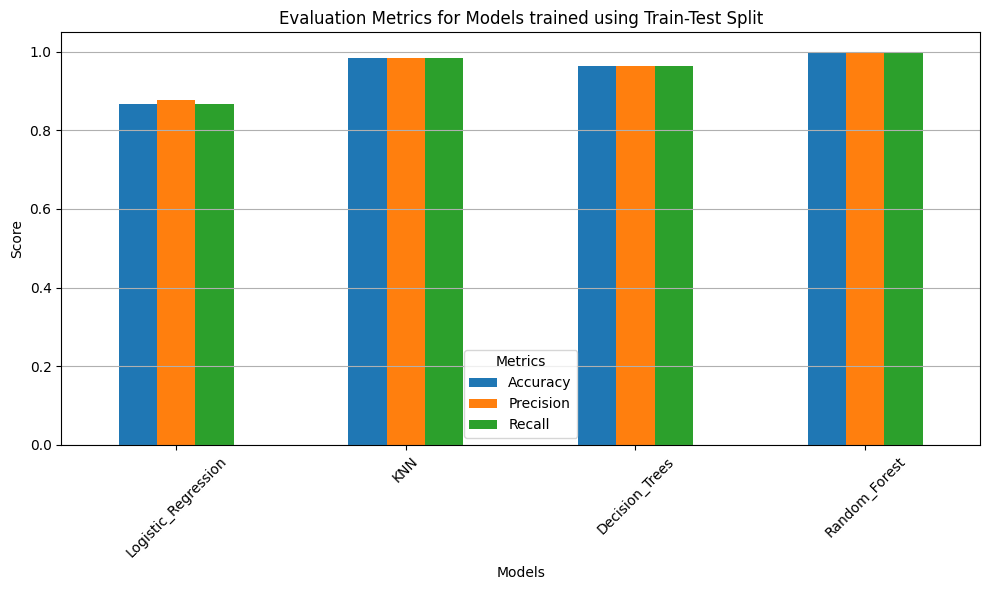

In [64]:
df_model_trained_by_tts.plot(kind='bar', figsize=(10, 6))
plt.title('Evaluation Metrics for Models trained using Train-Test Split')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Confusion matrix

In [75]:
def plot_confusion_matrix(model, X_test, y_test, model_name, ax):
    y_pred = model.predict(X_test)
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

C:\Users\yassi\AppData\Local\Temp\ipykernel_12964\1594019440.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


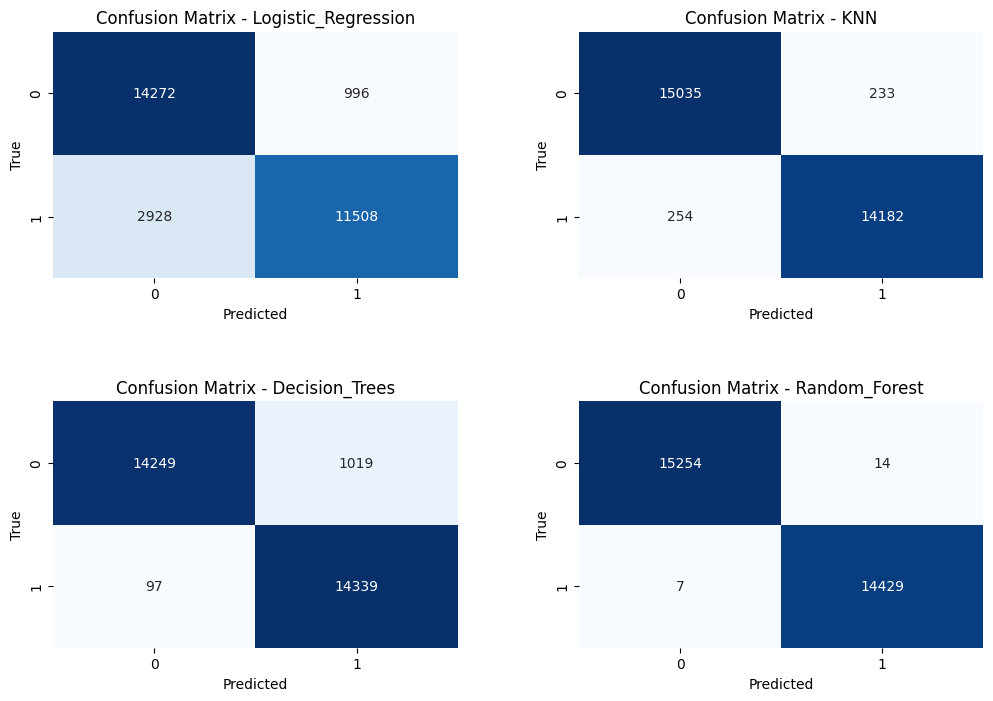

In [76]:
fig, axes = plt.subplots(nrows=len(models_to_analys) // 2, ncols=2, figsize=(12, 8), gridspec_kw={'hspace': 0.5, 'wspace': 0.3})

# Flatten the axes for easy iteration
axes = axes.flatten()

for i, (model_name, model) in enumerate(models_to_analys.items()):
    plot_confusion_matrix(model, x_test, y_test, model_name, axes[i])

# Remove empty subplot(s) if the number of models is odd
if len(models_to_analys) % 2 != 0:
    fig.delaxes(axes[len(models_to_analys)])

# Adjust layout
plt.tight_layout()
plt.show()

Dataframe to compare accuracy between tts and CV

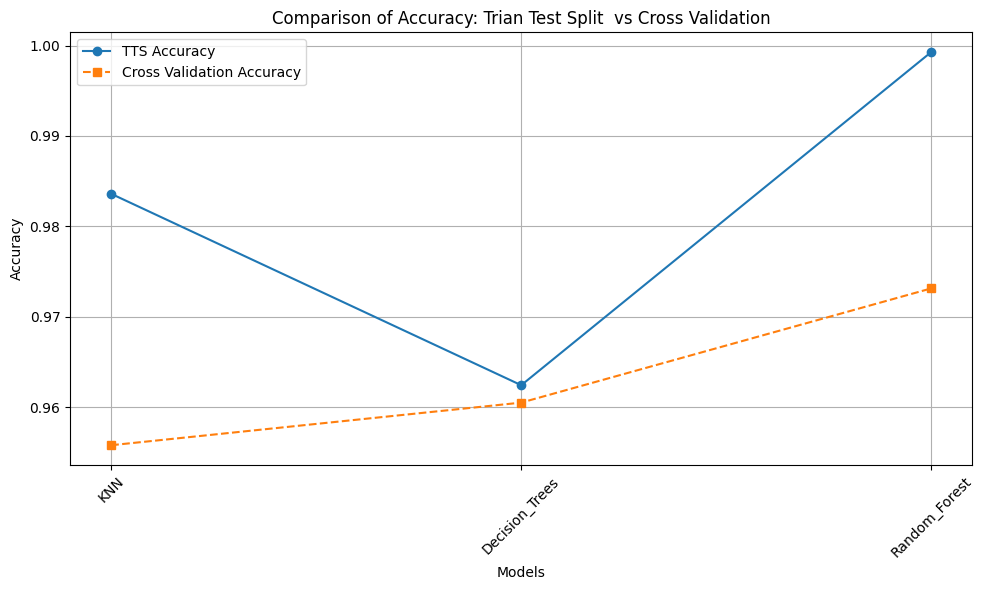

In [81]:
# Extract the names and accuracy scores of the last three models from train-test split
models_tts_names = list(accuracy_tts.keys())[1:]  
accuracy_tts_scores = list(accuracy_tts.values())[1:] 

# Extract the names and accuracy scores of all models from cross-validation
models_cv_names = list(accuracy_cv.keys())
accuracy_cv_scores = list(accuracy_cv.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(models_tts_names, accuracy_tts_scores, marker='o', linestyle='-', label='TTS Accuracy')
plt.plot(models_cv_names, accuracy_cv_scores, marker='s', linestyle='--', label='Cross Validation Accuracy')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy: Trian Test Split  vs Cross Validation')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


### Building ANN model

In [99]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
import pydot
import graphviz

define our model that we gonna use

In [83]:
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(x_train.shape[1:])),
    Dropout(0.4),
    Dense(units=128, activation='relu'),
    Dropout(0.4),
    Dense(units=512, activation='relu'),
    Dropout(0.4),
    Dense(units=128, activation='relu'),
    Dropout(0.4),
    Dense(units=1, activation='sigmoid')
])

# Add regularizations : is a technique used in machine learning and deep learning to prevent overfitting, 
# which occurs when a model learns to memorize the training data rather than generalize from it
for layer in model.layers:
    if isinstance(layer, Dense):
        layer.kernel_regularizer = regularizers.L1L2(l1=1e-5, l2=1e-4)
        layer.bias_regularizer = regularizers.L2(1e-4)
        layer.activity_regularizer = regularizers.L2(1e-5)


In [87]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy'])

model architecture

In [88]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2752      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               6

In [100]:
plot_model(model, to_file='./dataset/model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [103]:
model_train_hist = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=20, 
                    batch_size=32,
                    verbose=1)


Epoch 1/20
3709/3713 [============================>.] - ETA: 0s - loss: 103678536.0000 - accuracy: 0.8876

C:\Users\yassi\AppData\Roaming\Python\Python310\site-packages\keras\src\backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3713/3713 [==============================] - 53s 14ms/step - loss: 103570328.0000 - accuracy: 0.8876 - val_loss: 6514277.5000 - val_accuracy: 0.9313
Epoch 2/20
3713/3713 [==============================] - 49s 13ms/step - loss: 29574164.0000 - accuracy: 0.9235 - val_loss: 1127566.6250 - val_accuracy: 0.9364
Epoch 3/20
3713/3713 [==============================] - 50s 13ms/step - loss: 2048160.0000 - accuracy: 0.9315 - val_loss: 1.0356 - val_accuracy: 0.9434
Epoch 4/20
3713/3713 [==============================] - 40s 11ms/step - loss: 6.2940 - accuracy: 0.9384 - val_loss: 0.1835 - val_accuracy: 0.9550
Epoch 5/20
3713/3713 [==============================] - 43s 11ms/step - loss: 0.2096 - accuracy: 0.9404 - val_loss: 0.1814 - val_accuracy: 0.9446
Epoch 6/20
3713/3713 [==============================] - 49s 13ms/step - loss: 0.2114 - accuracy: 0.9373 - val_loss: 0.1493 - val_accuracy: 0.9577
Epoch 7/20
3713/3713 [==============================] - 55s 15ms/step - loss: 0.2114 - accuracy: 0.939

training and validation loss over epochs

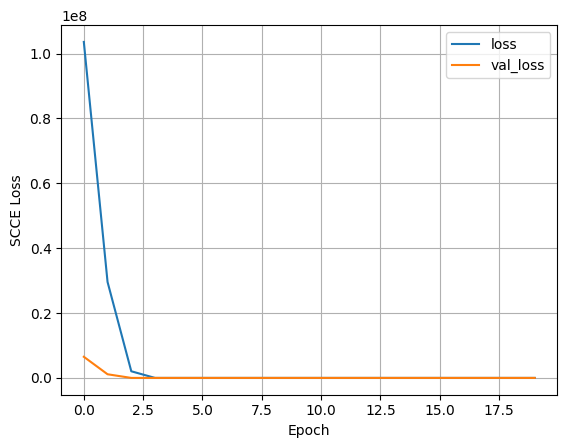

In [104]:
plt.plot(model_train_hist.history['loss'], label='loss')
plt.plot(model_train_hist.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

training and validation accuracy over epochs

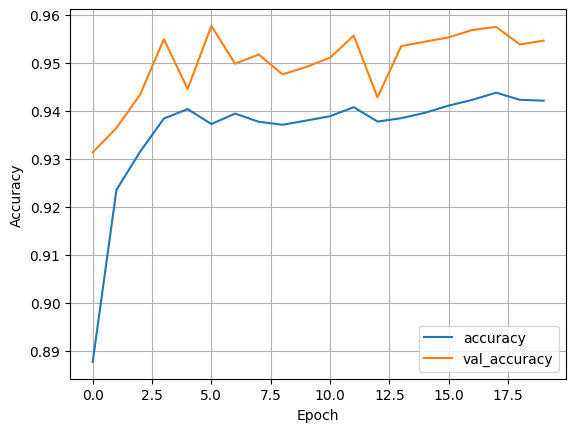

In [105]:
plt.plot(model_train_hist.history['accuracy'], label='accuracy')
plt.plot(model_train_hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [106]:
model.save('./models/my_model_IDS.h5')

C:\Users\yassi\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
